In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data=np.arange(10)

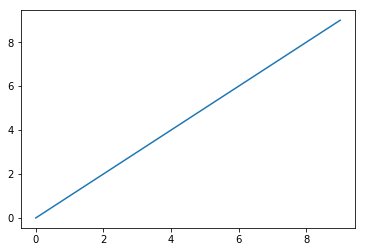

In [3]:
plt.plot(data)

In [4]:
#图片与子图

In [5]:
fig=plt.figure()

<Figure size 432x288 with 0 Axes>

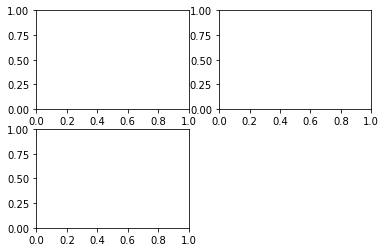

In [6]:
fig=plt.figure()
ax1=fig.add_subplot(2,2,1)
ax2=fig.add_subplot(2,2,2)
ax3=fig.add_subplot(2,2,3)

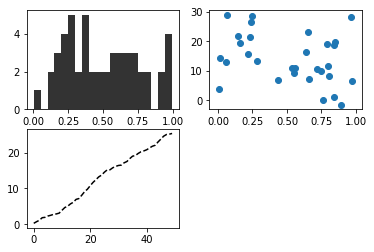

In [7]:
fig=plt.figure()
ax1=fig.add_subplot(2,2,1)
ax2=fig.add_subplot(2,2,2)
ax3=fig.add_subplot(2,2,3)
ax1.hist(np.random.rand(50),bins=20,color='k',alpha=0.8)
ax2.scatter(np.random.rand(30),np.arange(30)+3*np.random.randn(30))
ax3.plot(np.random.rand(50).cumsum(),'k--')
plt.show()

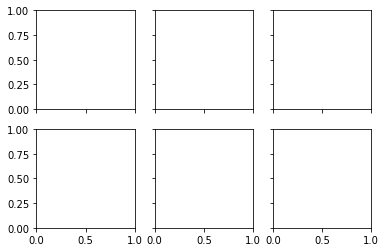

In [8]:
fig,axes=plt.subplots(2,3,sharex=True,sharey=True)

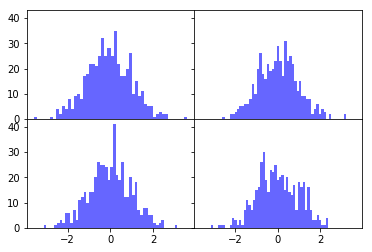

In [9]:
fig,axes=plt.subplots(2,2,sharex=True,sharey=True)
for i in range(2):
    for j in range(2):
        axes[i,j].hist(np.random.randn(500),bins=50,color='b',alpha=0.6)
plt.subplots_adjust(wspace=0,hspace=0)
plt.show()

In [10]:
#刻度、标签和图例

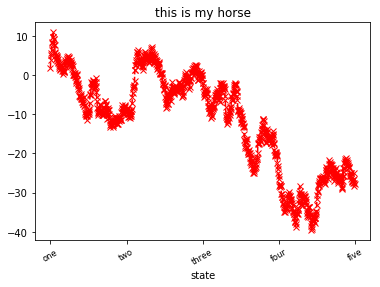

In [11]:
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
ax.plot(np.random.randn(1000).cumsum(),'rx--')
ticks=ax.set_xticks([0,250,500,750,1000])
lables=ax.set_xticklabels(['one','two','three','four','five'],rotation=30,fontsize='small')
ax.set_title('this is my horse')
ax.set_xlabel('state')
plt.show()

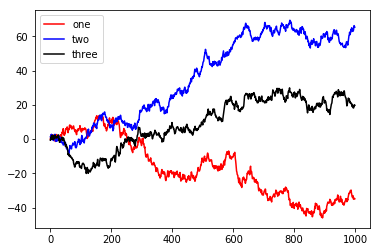

In [12]:
#添加图例
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
ax.plot(np.random.randn(1000).cumsum(),'r',label='one')
ax.plot(np.random.randn(1000).cumsum(),'b',label='two')
ax.plot(np.random.randn(1000).cumsum(),'k',label='three')       
plt.legend()
plt.show()

# 使用pandas和seaborn绘图

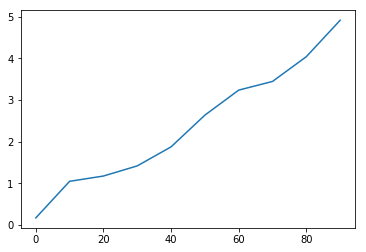

In [13]:
s = pd.Series(np.random.rand(10).cumsum(),index=np.arange(0,100,10))
s.plot()

In [14]:
df=pd.DataFrame(np.random.randn(10,4).cumsum(0),
               columns=['a','b','c','d'],
                index=np.arange(0,100,10))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000029652250C18>,
      dtype=object)

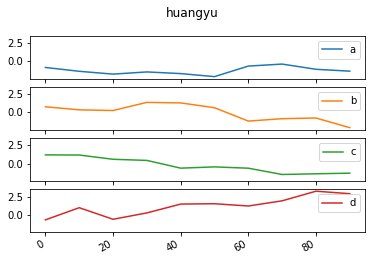

In [15]:
df.plot(subplots=(2,2),sharex=True,sharey=True,title='huangyu')

In [16]:
#柱状图

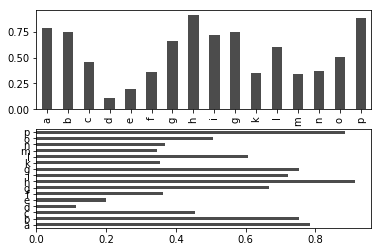

In [17]:
fig,axes=plt.subplots(2,1)
data=pd.Series(np.random.rand(16),index=list('abcdefghigklmnop'))
data.plot.bar(ax=axes[0],color='k',alpha=0.7)
data.plot.barh(ax=axes[1],color='k',alpha=0.7)

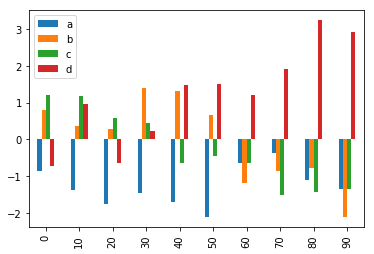

In [18]:
df.plot.bar()

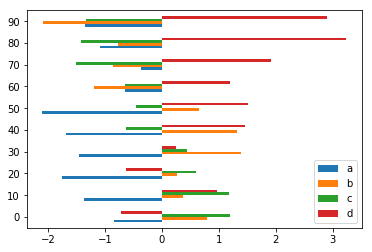

In [19]:
df.plot.barh()

# 第八章 数据聚合与分组操作

In [20]:
df = pd.DataFrame({
    'key1':['a','a','b','b','a'],
    'key2':['one','two','one','two','one'],
    'data1': np.random.randn(5),
    'data2': np.random.randn(5)
})

In [21]:
df

,key1,key2,data1,data2
0,a,one,0.111033,-1.323632
1,a,two,0.596484,1.445450
2,b,one,0.169760,-1.143460
3,b,two,0.391830,-0.267719
4,a,one,-0.217522,1.105515


In [22]:
grouped=df['data1'].groupby(df['key1'])

In [23]:
grouped

In [24]:
grouped.mean()

key1
a    0.163331
b    0.280795
Name: data1, dtype: float64

In [25]:
means=df['data1'].groupby([df['key1'],df['key2']]).mean()

In [26]:
means

key1  key2
a     one    -0.053245
      two     0.596484
b     one     0.169760
      two     0.391830
Name: data1, dtype: float64

In [27]:
means.unstack()

key2,one,two
key1,,
a,-0.053245,0.596484
b,0.169760,0.391830


In [28]:
df.groupby([df['key1'],df['key2']]).mean()

data1     data2
key1 key2                    
a    one  -0.053245 -0.109058
     two   0.596484  1.445450
b    one   0.169760 -1.143460
     two   0.391830 -0.267719

In [29]:
df.groupby(['key1','key2']).sum()

data1     data2
key1 key2                    
a    one  -0.106490 -0.218117
     two   0.596484  1.445450
b    one   0.169760 -1.143460
     two   0.391830 -0.267719

In [30]:
df.groupby(['key1','key2']).size()

key1  key2
a     one     2
      two     1
b     one     1
      two     1
dtype: int64

In [31]:
df.groupby('key1').mean()

,data1,data2
key1,,
a,0.163331,0.409111
b,0.280795,-0.705590


In [32]:
df

,key1,key2,data1,data2
0,a,one,0.111033,-1.323632
1,a,two,0.596484,1.445450
2,b,one,0.169760,-1.143460
3,b,two,0.391830,-0.267719
4,a,one,-0.217522,1.105515


In [33]:
for name , group in df.groupby('key1'):
    print(name)
    print(group)

a
  key1 key2     data1     data2
0    a  one  0.111033 -1.323632
1    a  two  0.596484  1.445450
4    a  one -0.217522  1.105515
b
  key1 key2    data1     data2
2    b  one  0.16976 -1.143460
3    b  two  0.39183 -0.267719


In [34]:
dict1=dict(list(df.groupby('key1')))

In [35]:
dict1['a']

,key1,key2,data1,data2
0,a,one,0.111033,-1.323632
1,a,two,0.596484,1.445450
4,a,one,-0.217522,1.105515


In [36]:
dict1['b']

,key1,key2,data1,data2
2,b,one,0.16976,-1.143460
3,b,two,0.39183,-0.267719


In [37]:
#按照列进行分组

In [38]:
df.dtypes

key1      object
key2      object
data1    float64
data2    float64
dtype: object

In [39]:
group=df.groupby(df.dtypes,axis=1)

In [40]:
for dtype,group1 in group:
    print(dtype)
    print(group1)

float64
      data1     data2
0  0.111033 -1.323632
1  0.596484  1.445450
2  0.169760 -1.143460
3  0.391830 -0.267719
4 -0.217522  1.105515
object
  key1 key2
0    a  one
1    a  two
2    b  one
3    b  two
4    a  one


In [41]:
# 选择一列或所有列的子集

In [42]:
df.groupby('key1')[['data1']].mean()

,data1
key1,
a,0.163331
b,0.280795


In [43]:
df.groupby('key1')['data1'].mean()

key1
a    0.163331
b    0.280795
Name: data1, dtype: float64

In [44]:
#使用字典和Series分组

In [45]:
people=pd.DataFrame(np.random.rand(5,5),
                   columns=['a','b','c','d','e'],
                   index=['joe','steve','wes','jim','travis']
                   )

In [46]:
people

,a,b,c,d,e
joe,0.034138,0.049744,0.526107,0.202469,0.023564
steve,0.020268,0.370913,0.437436,0.735473,0.326922
wes,0.231841,0.906860,0.706477,0.622691,0.361462
jim,0.181052,0.126733,0.146048,0.192776,0.209187
travis,0.918571,0.058068,0.012462,0.677657,0.545090


In [47]:
people.iloc[2:3,1:3]=np.nan

In [48]:
people

,a,b,c,d,e
joe,0.034138,0.049744,0.526107,0.202469,0.023564
steve,0.020268,0.370913,0.437436,0.735473,0.326922
wes,0.231841,NaN,NaN,0.622691,0.361462
jim,0.181052,0.126733,0.146048,0.192776,0.209187
travis,0.918571,0.058068,0.012462,0.677657,0.545090


In [49]:
mapping={
    'a':'red',
    'b':'red',
    'c':'blue',
    'd':'blue',
    'e':'red',
    'f':'orange'
}

In [50]:
mapping

{'a': 'red', 'b': 'red', 'c': 'blue', 'd': 'blue', 'e': 'red', 'f': 'orange'}

In [51]:
by_columns=people.groupby(mapping,axis=1)

In [52]:
by_columns

In [53]:
by_columns.sum()

,blue,red
joe,0.728576,0.107446
steve,1.172909,0.718103
wes,0.622691,0.593302
jim,0.338824,0.516971
travis,0.690120,1.521729


In [54]:
#使用Series

In [55]:
map_series=pd.Series(mapping)

In [56]:
map_series

a       red
b       red
c      blue
d      blue
e       red
f    orange
dtype: object

In [57]:
people.groupby(map_series,axis=1).count()

,blue,red
joe,2,3
steve,2,3
wes,1,2
jim,2,3
travis,2,3


In [58]:
#使用函数分组

In [59]:
people.groupby(len).sum()

,a,b,c,d,e
3,0.447031,0.176476,0.672155,1.017936,0.594213
5,0.020268,0.370913,0.437436,0.735473,0.326922
6,0.918571,0.058068,0.012462,0.677657,0.545090


In [60]:
key_list=['one','one','one','two','two']

In [61]:
people.groupby([len,key_list]).min()

a         b         c         d         e
3 one  0.034138  0.049744  0.526107  0.202469  0.023564
  two  0.181052  0.126733  0.146048  0.192776  0.209187
5 one  0.020268  0.370913  0.437436  0.735473  0.326922
6 two  0.918571  0.058068  0.012462  0.677657  0.545090

In [62]:
#根据索引层级分组

In [63]:
df=pd.DataFrame(np.random.randn(4,5),columns=[['us','us','us','jp','jp'],
                                              [1,3,5,1,3]])

In [64]:
df.columns.names=['city','tenor']

In [65]:
df

city         us                            jp          
tenor         1         3         5         1         3
0     -0.427972 -1.110685 -2.338777 -0.472085 -0.906092
1      0.745681 -1.589660 -0.020683 -2.223068 -0.060149
2      0.280199  0.277405  0.005110 -0.250222 -1.165547
3     -0.575870  0.036228 -2.336090  1.520018 -0.570033

In [66]:
df.groupby(level='city',axis=1).count()

city,jp,us
0,2,3
1,2,3
2,2,3
3,2,3


In [67]:
#数据聚合

In [68]:
df = pd.DataFrame({
    'key1':['a','a','b','b','a'],
    'key2':['one','two','one','two','one'],
    'data1': np.random.randn(5),
    'data2': np.random.randn(5)
})

In [69]:
df

,key1,key2,data1,data2
0,a,one,0.968874,-0.095212
1,a,two,0.349517,1.030546
2,b,one,-0.264904,-1.274035
3,b,two,-0.624778,0.946724
4,a,one,1.830253,-0.405151


In [70]:
df.groupby('key1')['data1'].quantile(0.9)

key1
a    1.657977
b   -0.300891
Name: data1, dtype: float64

In [71]:
df1=df.groupby('key1')

In [72]:
df1.describe()

data1                                                              \
     count      mean       std       min       25%       50%       75%   
key1                                                                     
a      3.0  1.049548  0.743657  0.349517  0.659195  0.968874  1.399563   
b      2.0 -0.444841  0.254470 -0.624778 -0.534809 -0.444841 -0.354872   

               data2                                                    \
           max count      mean       std       min       25%       50%   
key1                                                                     
a     1.830253   3.0  0.176727  0.755493 -0.405151 -0.250182 -0.095212   
b    -0.264904   2.0 -0.163655  1.570313 -1.274035 -0.718845 -0.163655   

                          
           75%       max  
key1                      
a     0.467667  1.030546  
b     0.391534  0.946724

In [73]:
data=pd.read_table('tips.txt',sep='\t')

In [74]:
data

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4
5,25.29,4.71,No,Sun,Dinner,4
6,8.77,2.00,No,Sun,Dinner,2
7,26.88,3.12,No,Sun,Dinner,4
8,15.04,1.96,No,Sun,Dinner,2
9,14.78,3.23,No,Sun,Dinner,2


In [75]:
party_counts=pd.crosstab(data['day'],data['size'])

In [76]:
party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [77]:
party_counts=party_counts.loc[:,2:5]

In [78]:
#数据归一化

In [79]:
party_pcts=party_counts.div(party_counts.sum(1),axis=0)

In [80]:
party_pcts

size,2,3,4,5
day,,,,
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000
Thur,0.827586,0.068966,0.086207,0.017241


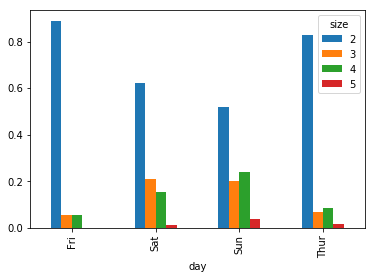

In [81]:
party_pcts.plot.bar()

In [82]:
import seaborn as sns

In [83]:
data['tip_pct'] = data['tip'] / (data['total_bill']-data['tip'])

In [84]:
data.head()

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069


E:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


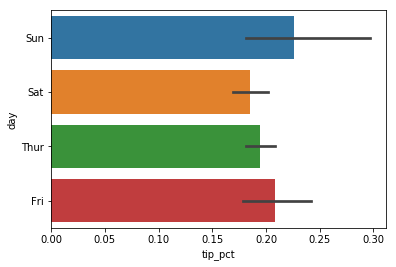

In [85]:
sns.barplot(x='tip_pct',y='day',data=data)

In [87]:
#直方图和密度图

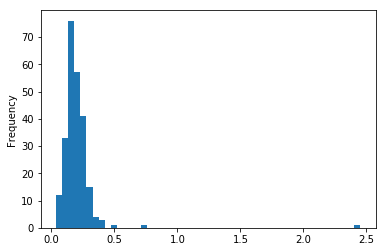

In [89]:
data['tip_pct'].plot.hist(bins=50)

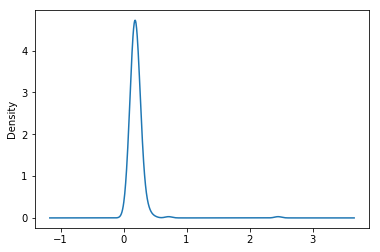

In [92]:
data['tip_pct'].plot.density()
plt.show()

# 逐列及函数应用

In [93]:
tips=pd.read_table("tips.txt",sep='\t')

In [94]:
tips.head()

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [95]:
tips['tip_pct']=tips['tip']/tips['total_bill']

In [96]:
tips[:6]

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.059447
1,10.34,1.66,No,Sun,Dinner,3,0.160542
2,21.01,3.50,No,Sun,Dinner,3,0.166587
3,23.68,3.31,No,Sun,Dinner,2,0.139780
4,24.59,3.61,No,Sun,Dinner,4,0.146808
5,25.29,4.71,No,Sun,Dinner,4,0.186240


In [106]:
grouped=tips.groupby(['day','smoker'])

In [107]:
grouped_pct=grouped['tip_pct']

In [108]:
grouped_pct.agg('mean')

day   smoker
Fri   No        0.151650
      Yes       0.174783
Sat   No        0.158048
      Yes       0.147906
Sun   No        0.160113
      Yes       0.187250
Thur  No        0.160298
      Yes       0.163863
Name: tip_pct, dtype: float64

In [114]:
grouped_pct.agg(['mean','std'])

mean       std
day  smoker                    
Fri  No      0.151650  0.028123
     Yes     0.174783  0.051293
Sat  No      0.158048  0.039767
     Yes     0.147906  0.061375
Sun  No      0.160113  0.042347
     Yes     0.187250  0.154134
Thur No      0.160298  0.038774
     Yes     0.163863  0.039389

In [115]:
grouped=tips.groupby(['day','smoker'])

In [117]:
result=group['tip_pct','total_bill'].agg(['mean','std','max'])

In [118]:
result

tip_pct                     total_bill                  
                 mean       std       max       mean        std    max
day  smoker                                                           
Fri  No      0.151650  0.028123  0.187735  18.420000   5.059282  22.75
     Yes     0.174783  0.051293  0.263480  16.813333   9.086388  40.17
Sat  No      0.158048  0.039767  0.291990  19.661778   8.939181  48.33
     Yes     0.147906  0.061375  0.325733  21.276667  10.069138  50.81
Sun  No      0.160113  0.042347  0.252672  20.506667   8.130189  48.17
     Yes     0.187250  0.154134  0.710345  24.120000  10.442511  45.35
Thur No      0.160298  0.038774  0.266312  17.113111   7.721728  41.19
     Yes     0.163863  0.039389  0.241255  19.190588   8.355149  43.11

In [119]:
result['tip_pct']

mean       std       max
day  smoker                              
Fri  No      0.151650  0.028123  0.187735
     Yes     0.174783  0.051293  0.263480
Sat  No      0.158048  0.039767  0.291990
     Yes     0.147906  0.061375  0.325733
Sun  No      0.160113  0.042347  0.252672
     Yes     0.187250  0.154134  0.710345
Thur No      0.160298  0.038774  0.266312
     Yes     0.163863  0.039389  0.241255

In [120]:
grouped.agg({'tip':['min','max','mean','std'],
            'size':'sum'})

tip                            size
              min    max      mean       std  sum
day  smoker                                      
Fri  No      1.50   3.50  2.812500  0.898494    9
     Yes     1.00   4.73  2.714000  1.077668   31
Sat  No      1.00   9.00  3.102889  1.642088  115
     Yes     1.00  10.00  2.875476  1.630580  104
Sun  No      1.01   6.00  3.167895  1.224785  167
     Yes     1.50   6.50  3.516842  1.261151   49
Thur No      1.25   6.70  2.673778  1.282964  112
     Yes     2.00   5.00  3.030000  1.113491   40

In [121]:
#应用：通用拆分——应用——联合

In [122]:
#分位数与桶分析
frame = pd.DataFrame({'data1': np.random.randn(1000),
                     'data2': np.random.randn(1000)})

In [123]:
quartiles=pd.cut(frame.data1,4)

In [125]:
quartiles[:10]

0     (-1.14, 0.292]
1     (-1.14, 0.292]
2     (0.292, 1.724]
3    (-2.578, -1.14]
4     (-1.14, 0.292]
5     (0.292, 1.724]
6     (-1.14, 0.292]
7     (0.292, 1.724]
8     (-1.14, 0.292]
9     (0.292, 1.724]
Name: data1, dtype: category
Categories (4, interval[float64]): [(-2.578, -1.14] < (-1.14, 0.292] < (0.292, 1.724] < (1.724, 3.156]]

In [126]:
frame[:10]

,data1,data2
0,-0.044218,1.802586
1,0.274422,0.903554
2,0.496503,-0.768494
3,-1.584091,0.159391
4,-0.038184,0.841329
5,0.354551,-0.087196
6,-0.846135,-0.265588
7,0.382496,-1.216251
8,-0.620897,0.549077
9,0.688007,-0.570328


In [127]:
#使用指定分组值填充缺失值

In [128]:
s=pd.Series(np.random.rand(6))

In [129]:
s[::2]=np.nan

In [130]:
s

0         NaN
1    0.063300
2         NaN
3    0.111549
4         NaN
5    0.872538
dtype: float64

In [131]:
s.fillna(s.mean())

0    0.349129
1    0.063300
2    0.349129
3    0.111549
4    0.349129
5    0.872538
dtype: float64

In [133]:
#数据透视表与交叉表

In [135]:
tips.pivot_table(index=['day','smoker'])

size       tip   tip_pct  total_bill
day  smoker                                          
Fri  No      2.250000  2.812500  0.151650   18.420000
     Yes     2.066667  2.714000  0.174783   16.813333
Sat  No      2.555556  3.102889  0.158048   19.661778
     Yes     2.476190  2.875476  0.147906   21.276667
Sun  No      2.929825  3.167895  0.160113   20.506667
     Yes     2.578947  3.516842  0.187250   24.120000
Thur No      2.488889  2.673778  0.160298   17.113111
     Yes     2.352941  3.030000  0.163863   19.190588

In [146]:
tips.pivot_table(['tip_pct','size'],index=['time','day'],columns='smoker')

size             tip_pct          
smoker             No       Yes        No       Yes
time   day                                         
Dinner Fri   2.000000  2.222222  0.139622  0.165347
       Sat   2.555556  2.476190  0.158048  0.147906
       Sun   2.929825  2.578947  0.160113  0.187250
       Thur  2.000000       NaN  0.159744       NaN
Lunch  Fri   3.000000  1.833333  0.187735  0.188937
       Thur  2.500000  2.352941  0.160311  0.163863

In [147]:
tips[:20]

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.059447
1,10.34,1.66,No,Sun,Dinner,3,0.160542
2,21.01,3.50,No,Sun,Dinner,3,0.166587
3,23.68,3.31,No,Sun,Dinner,2,0.139780
4,24.59,3.61,No,Sun,Dinner,4,0.146808
5,25.29,4.71,No,Sun,Dinner,4,0.186240
6,8.77,2.00,No,Sun,Dinner,2,0.228050
7,26.88,3.12,No,Sun,Dinner,4,0.116071
8,15.04,1.96,No,Sun,Dinner,2,0.130319
9,14.78,3.23,No,Sun,Dinner,2,0.218539
